In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from models.predict import StockPredictor

2024-12-18 16:22:34.813932: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-12-18 16:22:34.844132: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.8/lib64:/opt/spinnaker/lib:/home/rex/ros/catkin_ws/devel/lib:/opt/ros/noetic/lib:/opt/ros/noetic/lib/x86_64-linux-gnu:/home/rex/Documents/software_make/Linux_Software/Linux_Software/sFoundation/sFoundation/
2024-12-18 16:22:34.844148: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setu

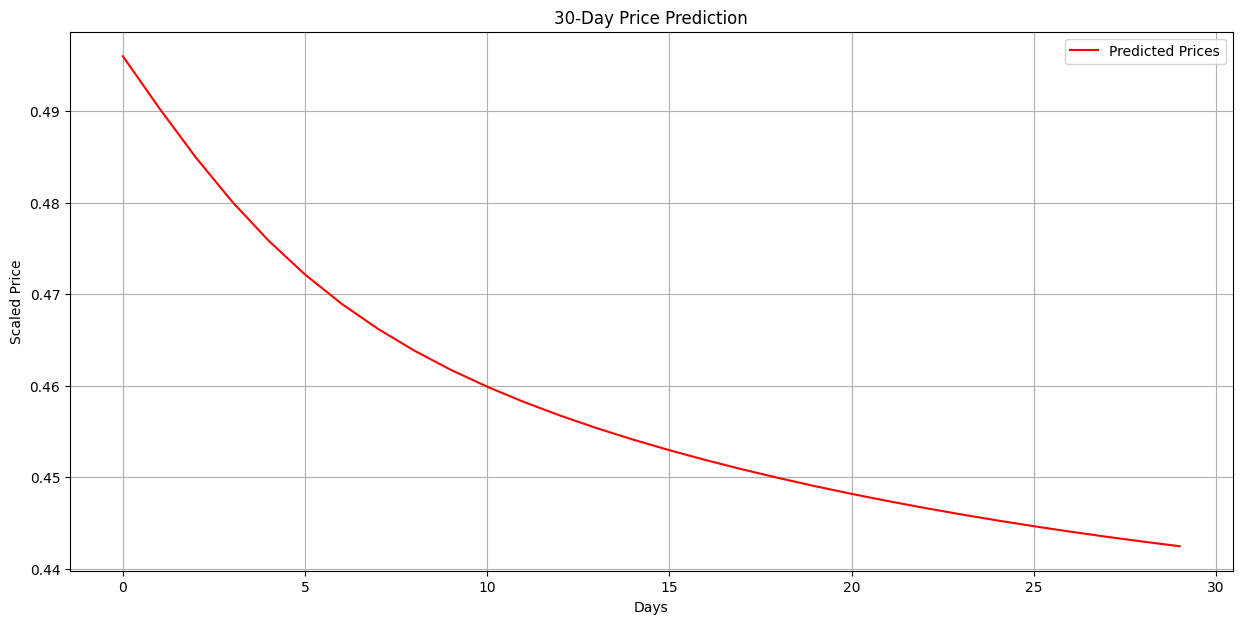

In [2]:
# Load test data
X_test = np.load('../data/processed/X_test.npy')
y_test = np.load('../data/processed/y_test.npy')

# Initialize predictor
predictor = StockPredictor()

# Make predictions for the next 30 days
initial_sequence = X_test[0]
future_predictions = predictor.predict_multiple_days(initial_sequence, days=30)

# Plot the predictions
plt.figure(figsize=(15, 7))
plt.plot(range(len(future_predictions)), future_predictions, 'r-', label='Predicted Prices')
plt.title('30-Day Price Prediction')
plt.xlabel('Days')
plt.ylabel('Scaled Price')
plt.legend()
plt.grid(True)
plt.show()


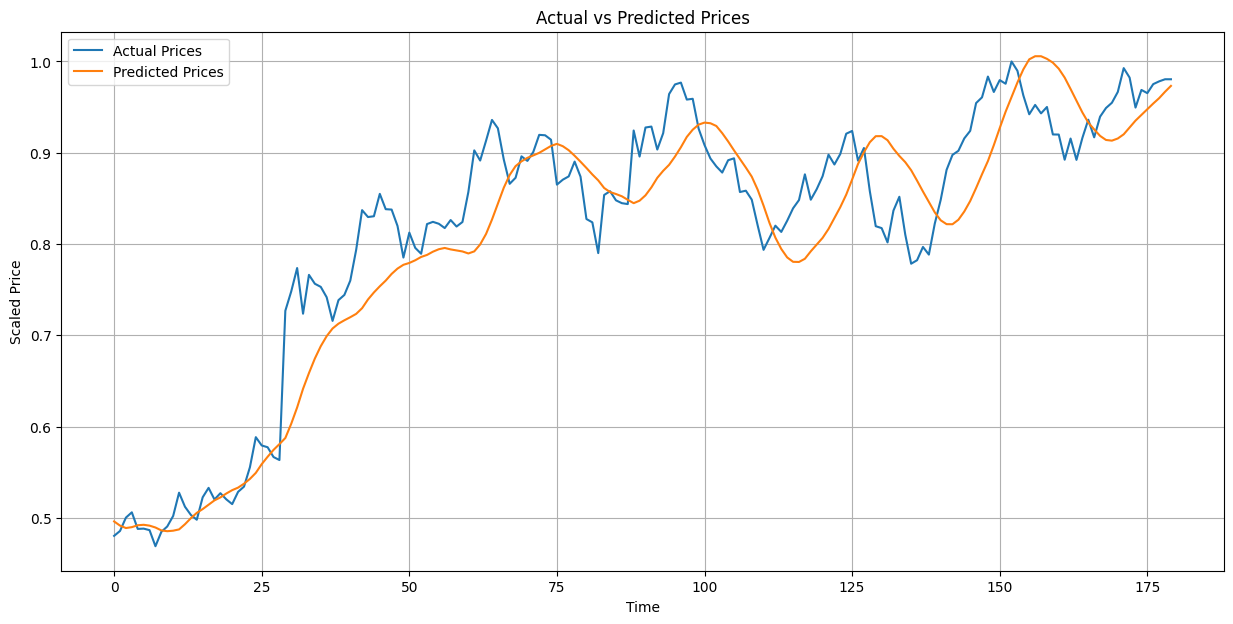

Mean Squared Error: 0.002995
Mean Absolute Error: 0.043382


In [3]:
# Compare predictions with actual values for the test set
actual_vs_predicted = []
for i in range(len(X_test)):
    sequence = X_test[i]
    actual = y_test[i]
    predicted = predictor.predict_next_day(sequence)
    actual_vs_predicted.append((actual, predicted))

# Unzip the pairs into two lists
actuals, predictions = zip(*actual_vs_predicted)

# Plot actual vs predicted values
plt.figure(figsize=(15, 7))
plt.plot(actuals, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Scaled Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate some error metrics
mse = np.mean((np.array(actuals) - np.array(predictions)) ** 2)
mae = np.mean(np.abs(np.array(actuals) - np.array(predictions)))
print(f"Mean Squared Error: {mse:.6f}")
print(f"Mean Absolute Error: {mae:.6f}")
